# Playground competition Season 4 episode 1 - First Model

## ETL

First we are going to do the ETL, performing every step through this notebook.

The first step is to create a folder where you will store the project and create or clone this notebook to start working.

### Data Download



In [1]:
# ! pip install kaggle # if you don't have kaggle API uncomment this line
! kaggle competitions download playground-series-s4e1 
# please be aware that you'll need to accept T&C in kaggle's website if you haven't done it yet


  0%|          | 0.00/6.81M [00:00<?, ?B/s]
 15%|█▍        | 1.00M/6.81M [00:01<00:05, 1.02MB/s]
 29%|██▉       | 2.00M/6.81M [00:01<00:02, 2.05MB/s]
 44%|████▍     | 3.00M/6.81M [00:01<00:01, 3.22MB/s]
 59%|█████▊    | 4.00M/6.81M [00:01<00:00, 4.00MB/s]
 73%|███████▎  | 5.00M/6.81M [00:01<00:00, 4.60MB/s]
 88%|████████▊ | 6.00M/6.81M [00:01<00:00, 4.89MB/s]
100%|██████████| 6.81M/6.81M [00:01<00:00, 5.17MB/s]
100%|██████████| 6.81M/6.81M [00:01<00:00, 3.67MB/s]


### Data extraction

In [2]:
# lets create the Datasets folder
! mkdir Datasets 

A subdirectory or file Datasets already exists.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import itertools
import zipfile

In [4]:
ruta_zip = 'playground-series-s4e1.zip' # defining zip path
ruta_extraccion ='Datasets/' # defining our datasets path

with zipfile.ZipFile(ruta_zip,'r') as f: # simple with extraction
    f.extractall(pwd=None,path=ruta_extraccion)

In [5]:
! del playground-series-s4e1.zip # deleting extracted zip file

#### Train.csv

In [6]:
df_train = pd.read_csv('Datasets/train.csv') # using pandas to read the test set
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
df_train.describe() # quick check for outliers and mistakes (if you see the difference between min, max and mean).

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
df_train.shape # how much data do we have?

(165034, 14)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [10]:
#dic_types = {}
#cols = ['Col_name','Col_types','Nans','%_Nans']
dic_types = {'Col_name':[],'Col_types':[],'Nans':[],'%_Nans':[]}


for column in df_train:
    totals = df_train[column].shape[0]
    types = list(df_train[column].apply(lambda x: type(x)).unique())
    nans = df_train[column].isna().sum()
    nans_per = round(nans/totals * 100,0)
    
    dic_types['Col_name'].append(column)
    dic_types['Col_types'].append(types)
    dic_types['Nans'].append(nans)
    dic_types['%_Nans'].append(nans_per)


classes = pd.DataFrame(dic_types)
classes

,Col_name,Col_types,Nans,%_Nans
0,id,[<class 'int'>],0,0.0
1,CustomerId,[<class 'int'>],0,0.0
2,Surname,[<class 'str'>],0,0.0
3,CreditScore,[<class 'int'>],0,0.0
4,Geography,[<class 'str'>],0,0.0
5,Gender,[<class 'str'>],0,0.0
6,Age,[<class 'float'>],0,0.0
7,Tenure,[<class 'int'>],0,0.0
8,Balance,[<class 'float'>],0,0.0
9,NumOfProducts,[<class 'int'>],0,0.0


In [11]:
useless_cols = ['id','CustomerId','Surname'] #lets set the useless columns that we will need later

In [12]:
df_train.drop(columns=useless_cols,inplace=True)
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [13]:
string_cols = ['Geography','Gender']
target = ['Exited']

for col in string_cols:
    print(df_train[col].drop_duplicates()) # data looks clean until now


0     France
4      Spain
5    Germany
Name: Geography, dtype: object
0      Male
6    Female
Name: Gender, dtype: object


So, in this part we learned that we will need to do a nominal categorical variable transformation for both variables, in other words, pd.get_dummies().

In [14]:
df_train = pd.get_dummies(df_train,columns=string_cols,dtype=int)
df_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1,1,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0,0,1
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0,0,1
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1,1,0


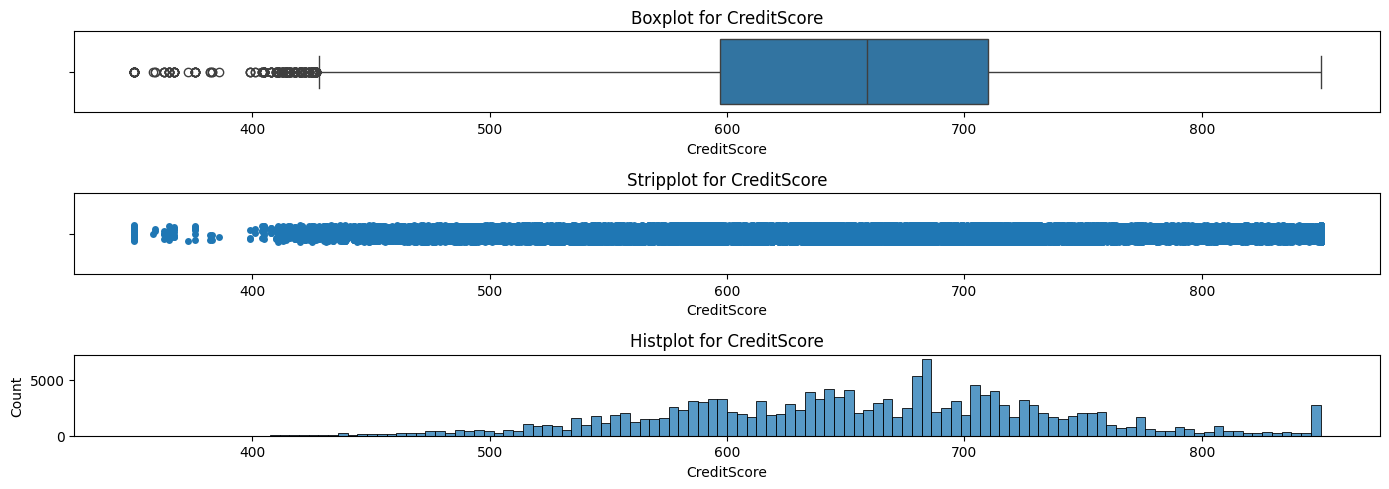

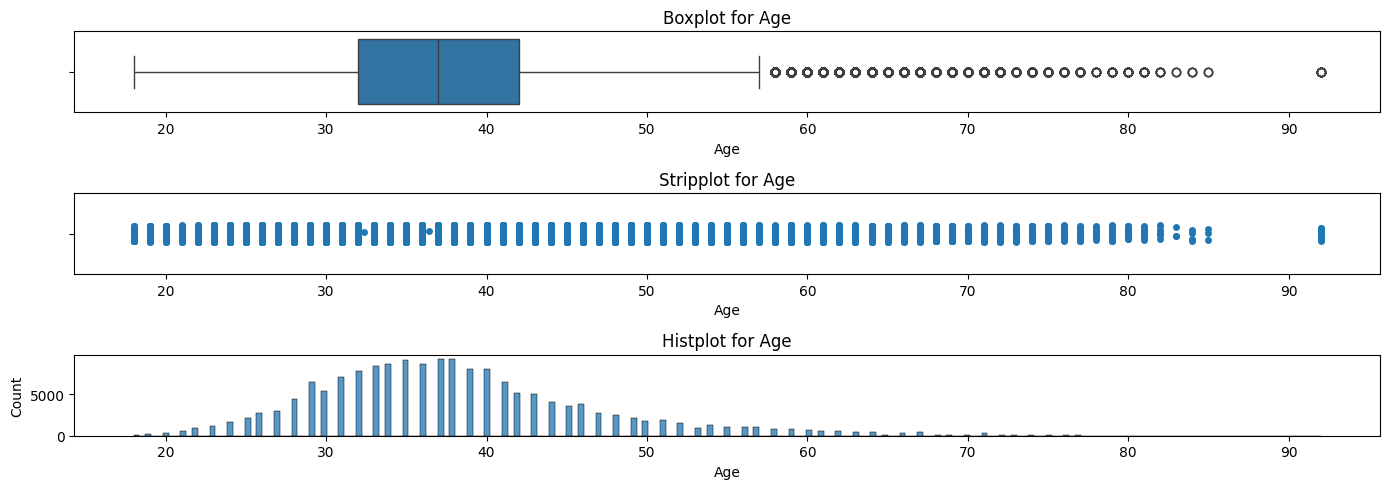

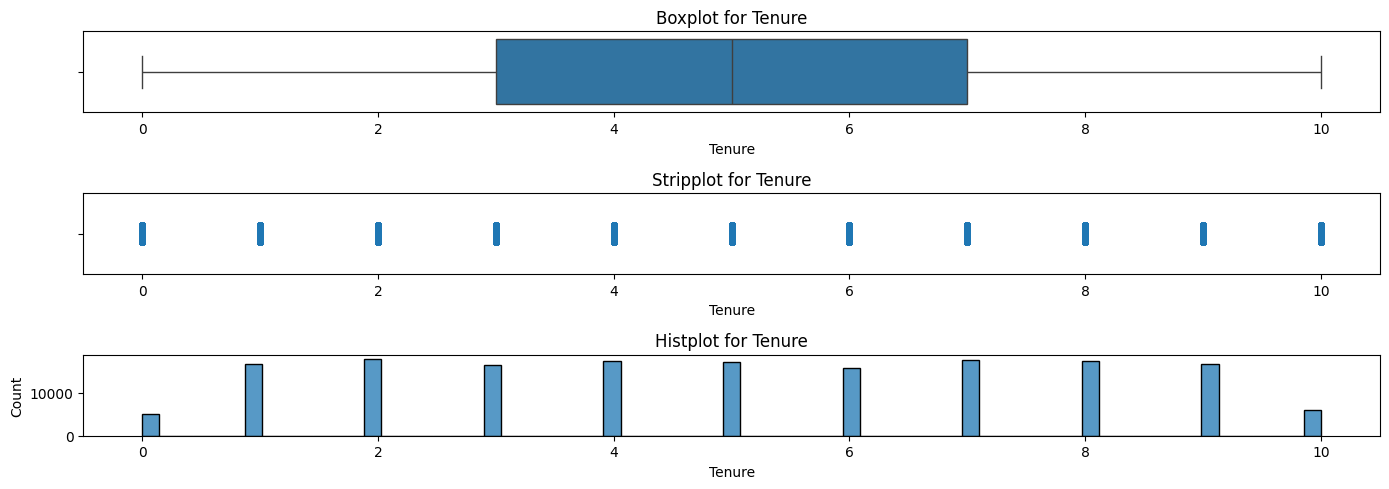

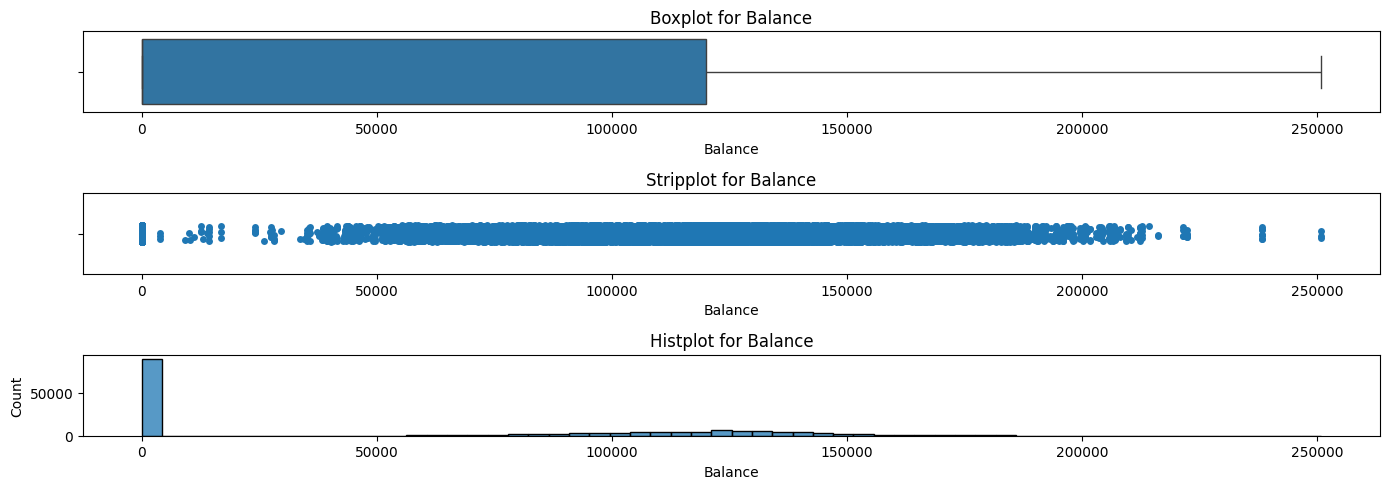

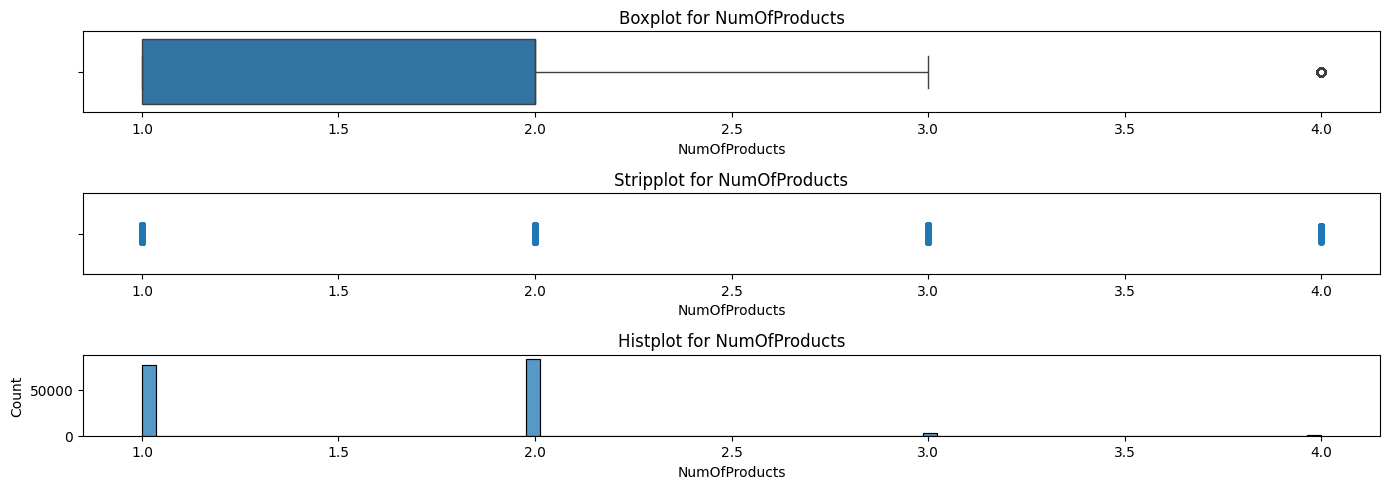

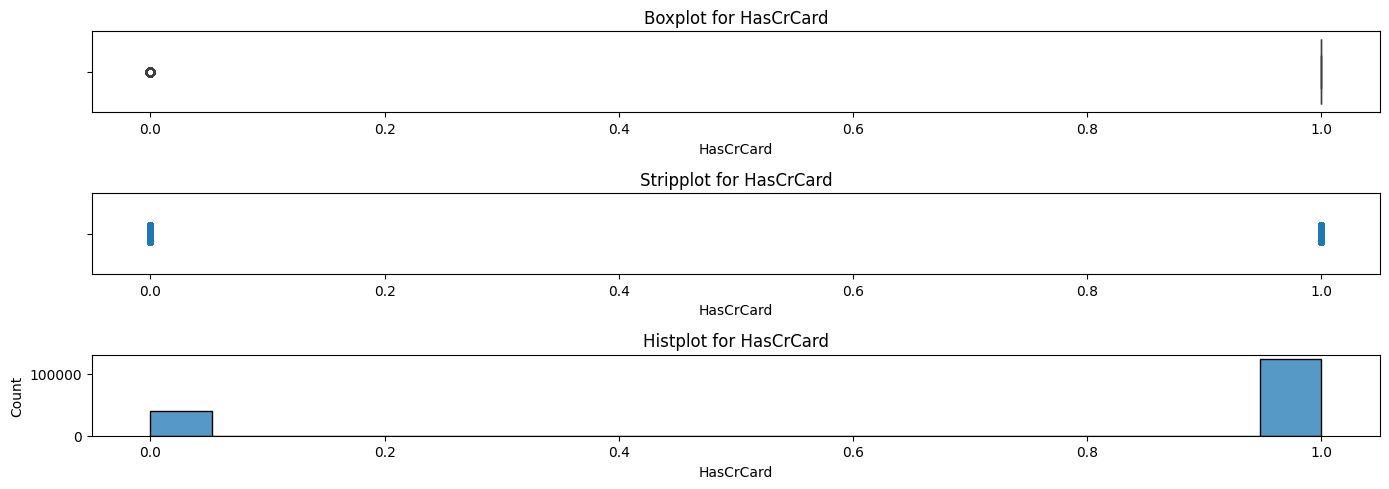

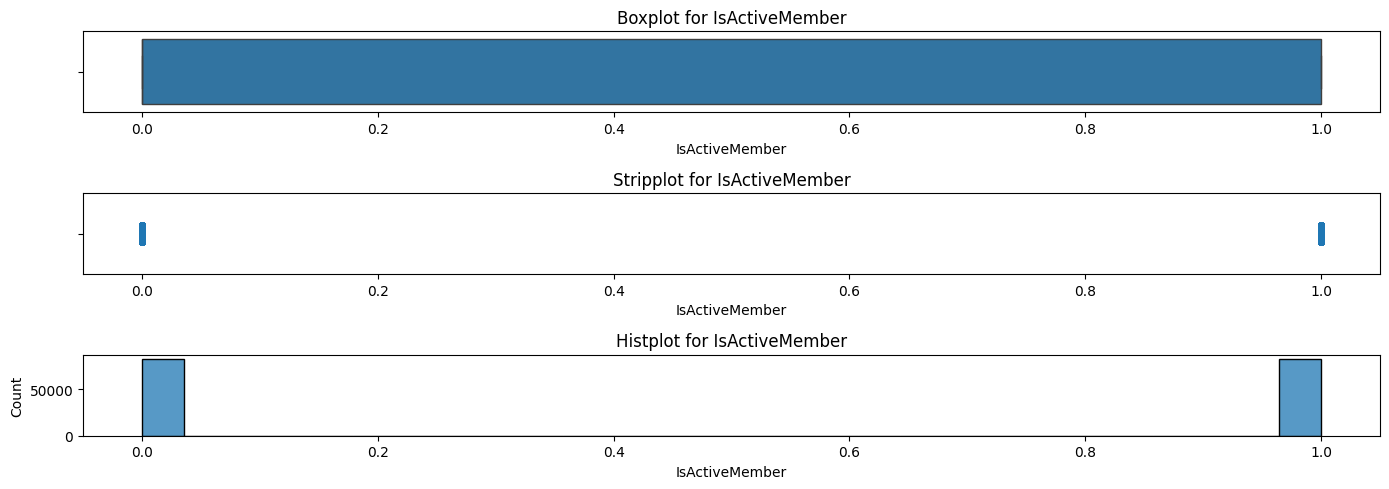

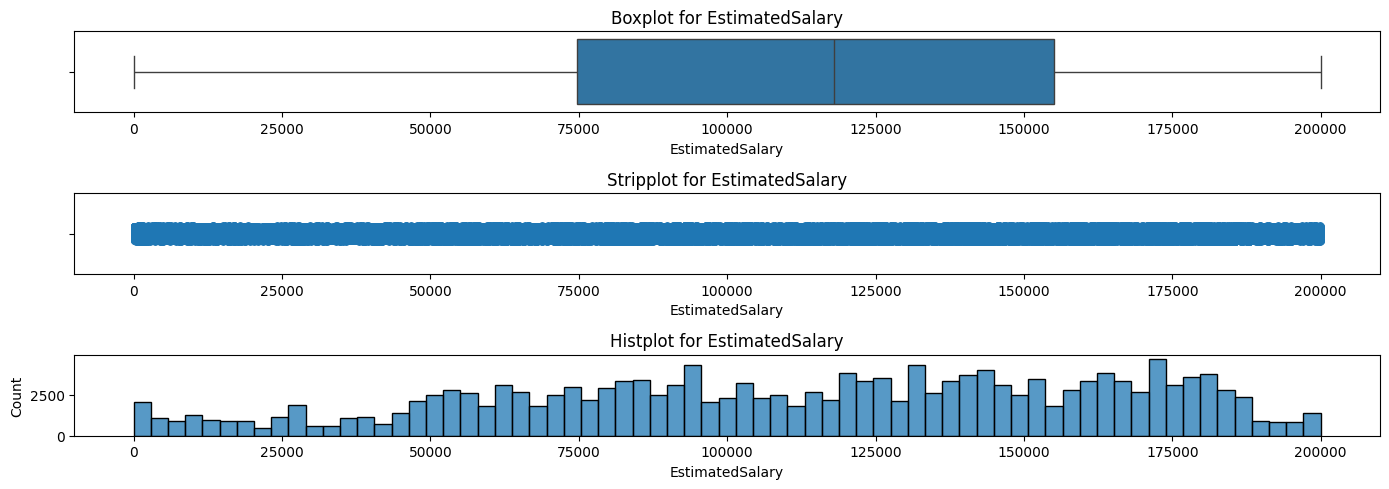

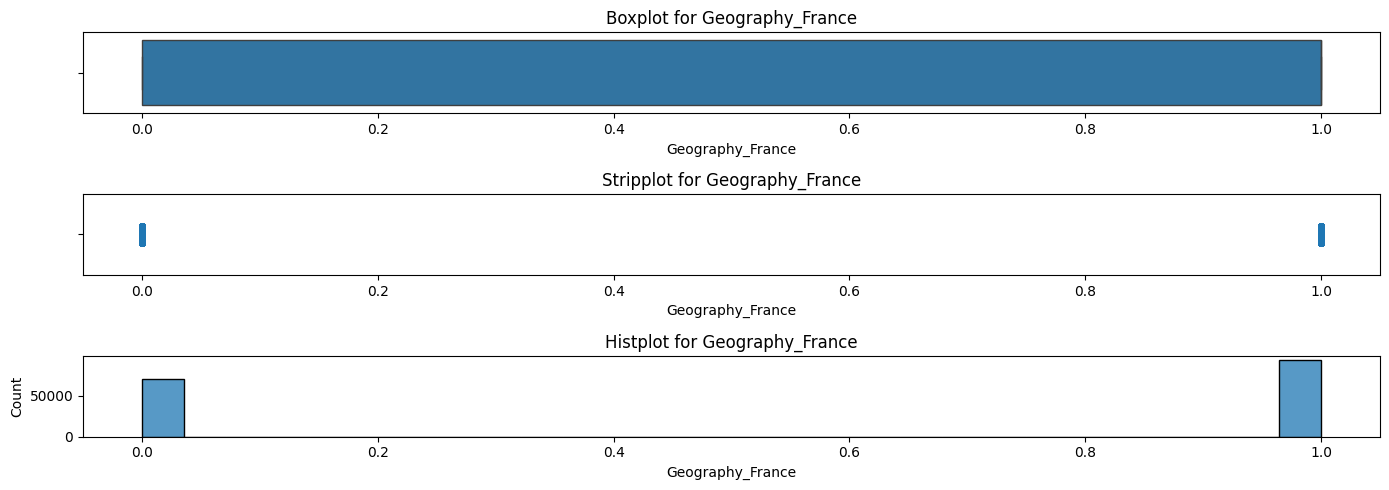

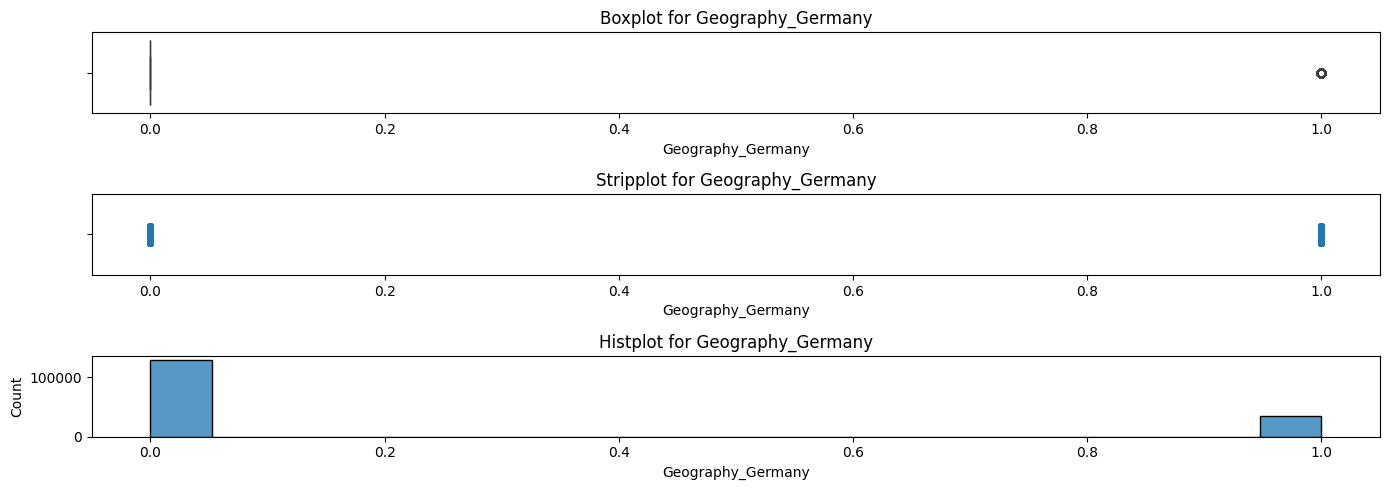

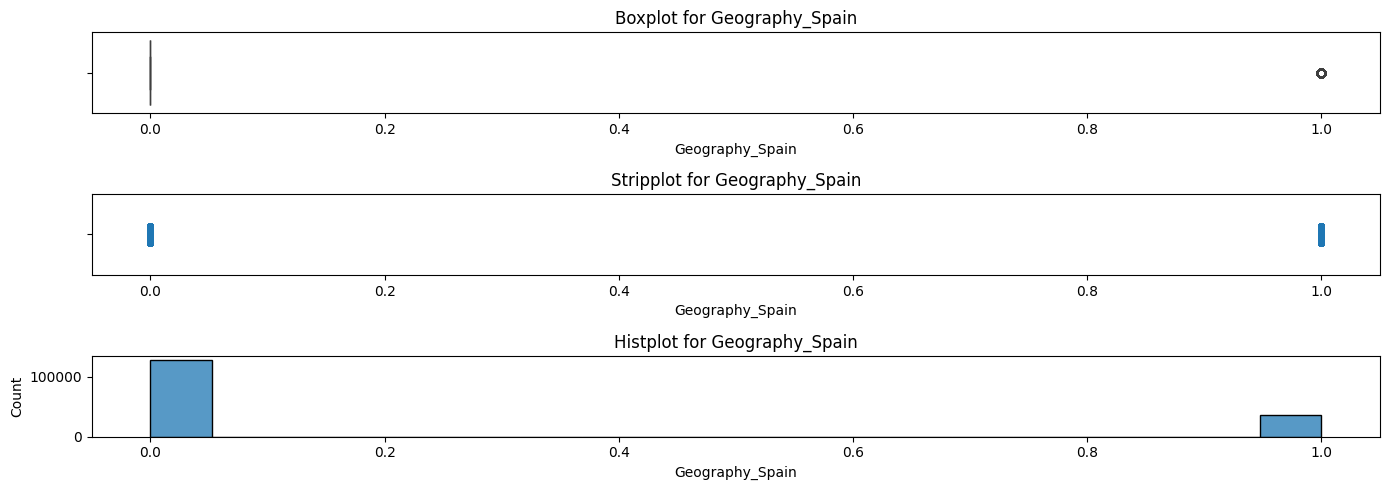

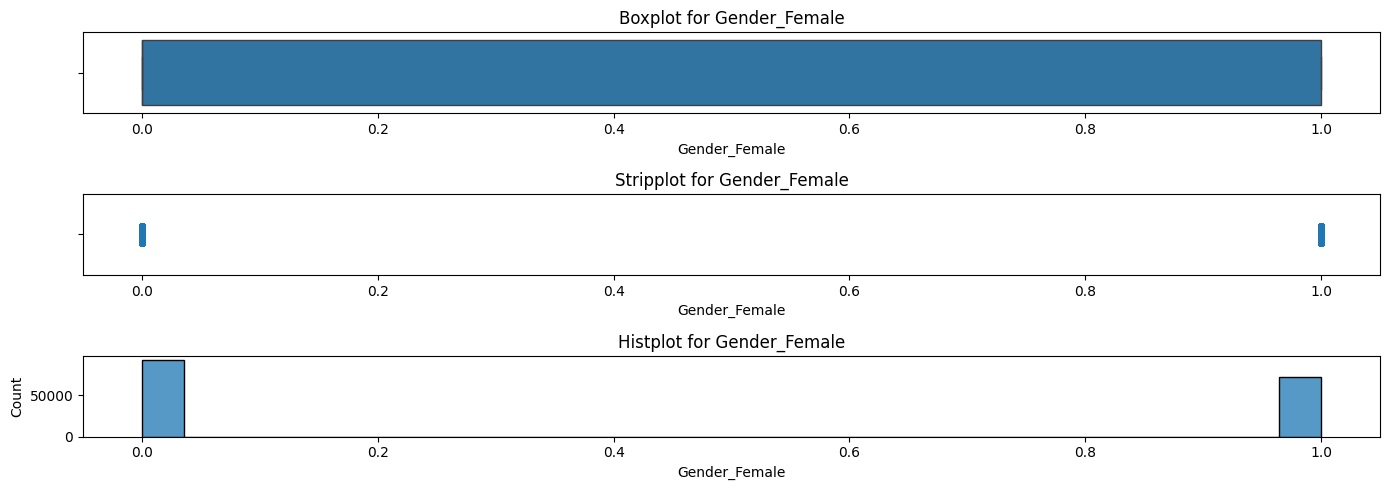

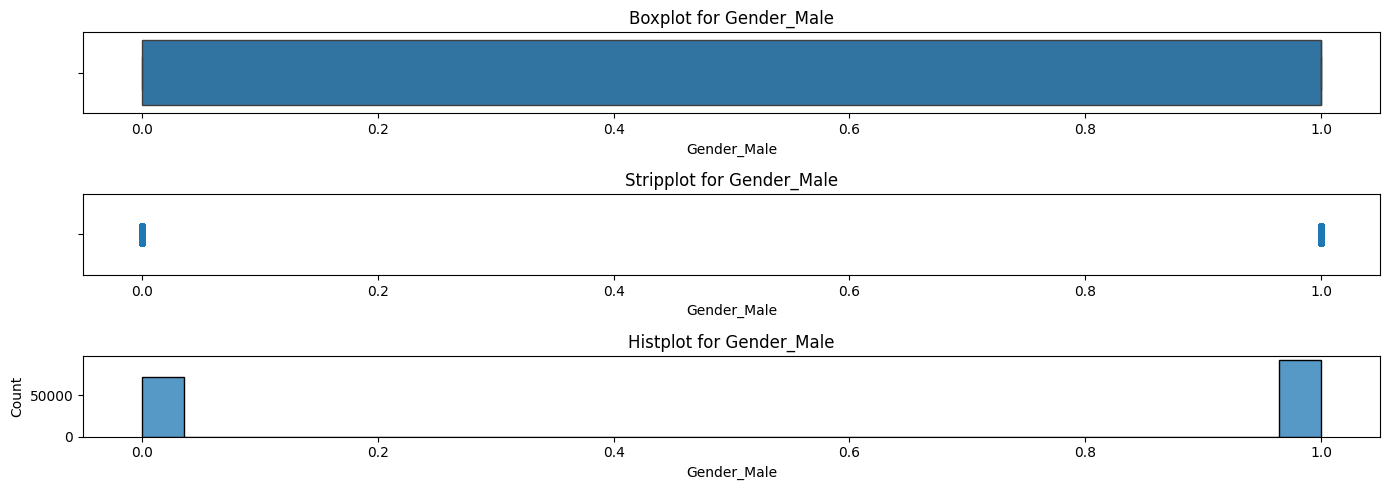

In [15]:
# lets check number cols
for col in df_train:
    if col in string_cols or col in useless_cols or col in target:
        continue
    else:
        plt.figure(figsize=(14,5))
        plt.subplot(3,1,1)
        plt.title(f'Boxplot for {col}')
        sns.boxplot(data=df_train,x=col)
        plt.subplot(3,1,2)
        plt.title(f'Stripplot for {col}')
        sns.stripplot(data=df_train,x=col)
        plt.subplot(3,1,3)
        plt.title(f'Histplot for {col}')
        sns.histplot(data=df_train,x=col)
        plt.tight_layout()
        plt.show()

Continuing with our understanding of this dataset, we have the following:
<ul><li>CreditScore: A continuous variable with some low outliers - we will use RobustScaler.</li>
<li>Age: A non-continuous variable with some high outliers - we will use RobustScaler. </li>
<li>Tenure: Non-continuous variable with no outliers and normal-like distribution - StandarScaler will be.</li>
<li>Balance: Continuous with both limits outliers - RobustScaler. </li>
<li>NumOfProducts: Non-continuous variable with high limit outliers - RobustScaler. </li>
<li>HasHrCard: Binary variable. </li>
<li>IsActiveMember: Binary variable. </li>
<li>EstimatedSalary: Continuous variable with little to no outliers with a non-normal distribution - MinMaxScaler.</li>
</ul>

In [16]:
robust = ['CreditScore','Age','Balance','NumOfProducts']
standard = ['Tenure']
minmax = ['EstimatedSalary']

In [17]:
df_train['Age'].values

array([33., 33., 40., ..., 31., 30., 31.])

In [18]:
scalers = {}

for col in df_train.columns:
    if col in robust:
        scalers.update({col:RobustScaler()})
        df_train[col] = scalers[col].fit_transform(df_train[col].values.reshape(-1,1))
    elif col in standard:
        scalers.update({col:StandardScaler()})
        df_train[col] = scalers[col].fit_transform(df_train[col].values.reshape(-1,1))
    elif col in minmax:
        scalers.update({col:MinMaxScaler()})
        df_train[col] = scalers[col].fit_transform(df_train[col].values.reshape(-1,1))
    else:
        continue


In [19]:
df_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.079646,-0.4,-0.719973,0.000000,0.0,1.0,0.0,0.907279,0,1,0,0,0,1
1,-0.283186,-0.4,-1.432694,0.000000,0.0,1.0,1.0,0.247483,0,1,0,0,0,1
2,0.168142,0.3,1.774548,0.000000,0.0,1.0,0.0,0.924364,0,1,0,0,0,1
3,-0.690265,-0.3,-1.076334,1.241313,-1.0,1.0,1.0,0.422787,0,1,0,0,0,1
4,0.504425,-0.4,-0.007253,0.000000,0.0,1.0,1.0,0.075293,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.070796,-0.4,-1.076334,0.000000,-1.0,1.0,1.0,0.659179,0,0,0,1,1,0
165030,1.176991,-0.2,-0.719973,0.000000,-1.0,0.0,0.0,0.659177,0,1,0,0,0,1
165031,-0.831858,-0.6,-0.007253,0.000000,-1.0,1.0,1.0,0.637151,0,1,0,0,0,1
165032,-0.929204,-0.7,0.705467,1.346787,-1.0,0.0,1.0,0.355841,0,0,0,1,1,0


In [20]:
scalers

{'CreditScore': RobustScaler(),
 'Age': RobustScaler(),
 'Tenure': StandardScaler(),
 'Balance': RobustScaler(),
 'NumOfProducts': RobustScaler(),
 'EstimatedSalary': MinMaxScaler()}

<Axes: >

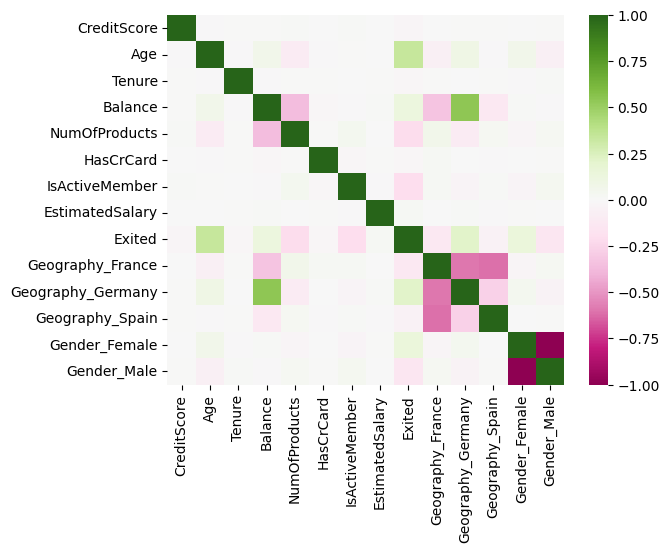

In [21]:
sns.heatmap(df_train.corr(),cmap="PiYG")

In [22]:
df_train.drop(columns=['Gender_Male','Geography_Spain'],inplace=True)

<Axes: >

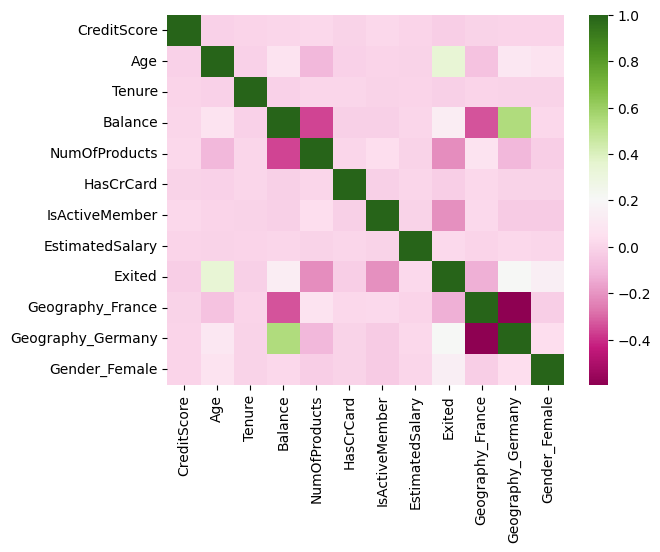

In [23]:
sns.heatmap(df_train.corr(),cmap="PiYG")

## ML Model

In [25]:
X = df_train.drop(columns='Exited')
y = df_train.Exited

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [28]:
from sklearn.metrics import roc_auc_score

models = {
    #'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(eval_metric='auc'),
    #'RandomForest': RandomForestClassifier(),
    #'GradientBoosting': GradientBoostingClassifier()
}

param_grids = {
    #'LightGBM':{'n_estimators': [10,30,50, 100, 200],'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [ 50, 70, 100], 'max_depth': [3, 5, 7],'booster':['gbtree'],'eta':[0.3,0.1]},
    #'RandomForest': {'n_estimators': [50], 'max_depth': [None, 10]},
    #'GradientBoosting': {'n_estimators': [50], 'max_depth': [3, 7]}
}

results = []

for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    y_pred = grid_search.predict_proba(X_test)[:,1]
    accuracy = roc_auc_score(y_test, y_pred)

    result = {
        'Model': model_name,
        'Best_Params': best_params,
        'Test_Accuracy': accuracy
    }
    results.append(result)
    print(f'Finalizado el analisis de {model_name}\n')
    print(result)

results_df = pd.DataFrame(results)
print(results_df)


Finalizado el analisis de XGBoost

{'Model': 'XGBoost', 'Best_Params': {'booster': 'gbtree', 'eta': 0.3, 'max_depth': 3, 'n_estimators': 100}, 'Test_Accuracy': 0.8926787862433263}
     Model                                        Best_Params  Test_Accuracy
0  XGBoost  {'booster': 'gbtree', 'eta': 0.3, 'max_depth':...       0.892679


In [29]:
modelo_final = {'XGBoost': XGBClassifier()}

params_final = {'booster': 'gbtree', 'eta': 0.3, 'max_depth': 3, 'n_estimators': 100}

In [31]:
best_model = None
best_columns = None
best_accuracy = 0.0
all_columns = X.columns
wanted_list = ['Geography_Germany','Age','IsActiveMember']

# Iterar sobre todas las combinaciones de columnas
for r in range(1, len(all_columns) + 1):
    for columns_combination in itertools.combinations(all_columns, r):
        if not set(wanted_list).issubset(columns_combination):
            continue
        # Crear un nuevo DataFrame con las columnas seleccionadas
        X_train_subset = X_train[list(columns_combination)]

        # Inicializar y ajustar el modelo XGBoost
        model = XGBClassifier(**params_final,eval_metric='auc')
        model.fit(X_train_subset, y_train)

        X_test_subset = X_test[list(columns_combination)]

        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict_proba(X_test_subset)[:,1]

        # Calcular la precisión
        accuracy = roc_auc_score(y_test, y_pred)

        # Actualizar los mejores resultados si se obtiene una precisión superior
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_columns = columns_combination
        
        print(model)
        print(accuracy)

print("Mejor combinación de columnas:", best_columns)
print("Mejor precisión:", best_accuracy)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)
0.8133435847502775
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categor

In [32]:
best_columns

('CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Geography_Germany',
 'Gender_Female')

In [33]:
final_model = XGBClassifier(**params_final,eval_metric='auc')
X_final = X[list(best_columns)]
y_final = y
final_model.fit(X_final,y_final)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

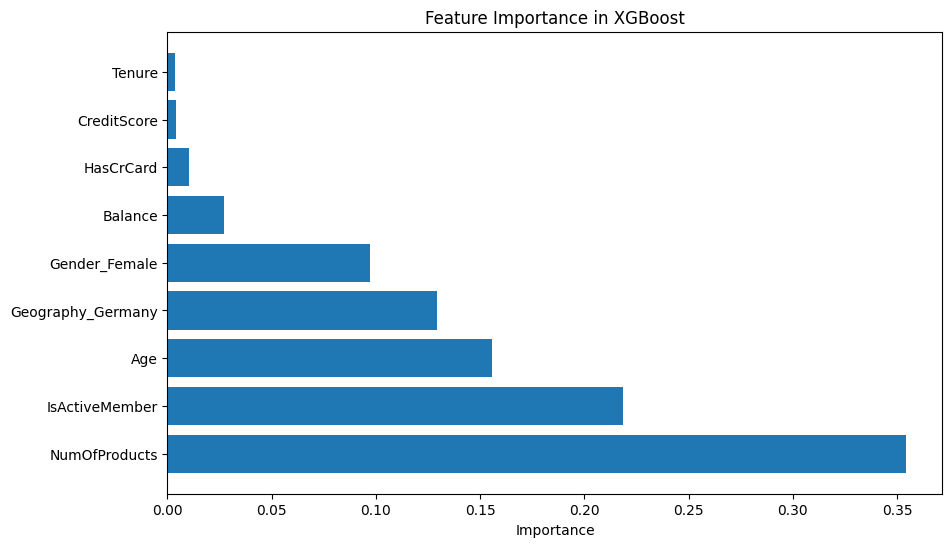

In [34]:
# Obtener la importancia de las características
feature_importance = final_model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({
    'Feature': best_columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in XGBoost')
plt.show()

In [35]:
df_test = pd.read_csv('Datasets/test.csv')

df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [36]:
df_test = pd.get_dummies(df_test,columns=string_cols,dtype=int)
df_test

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,165034,15773898,Lucchese,586,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1,0
1,165035,15782418,Nott,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,1,0
2,165036,15807120,K?,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,1,0
3,165037,15808905,O'Donnell,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0,1
4,165038,15607314,Higgins,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,1,0,1
110019,275053,15774133,Cox,575,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0,1,0
110020,275054,15728456,Ch'iu,712,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0,0,1
110021,275055,15687541,Yegorova,709,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0,1,0


In [37]:
df_test.drop(columns=['Gender_Male','Geography_Spain'],inplace=True)
df_test

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Gender_Female
0,165034,15773898,Lucchese,586,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,1
1,165035,15782418,Nott,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,1
2,165036,15807120,K?,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,1
3,165037,15808905,O'Donnell,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0
4,165038,15607314,Higgins,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,0
110019,275053,15774133,Cox,575,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,1
110020,275054,15728456,Ch'iu,712,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0
110021,275055,15687541,Yegorova,709,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,1


In [38]:
scalers

{'CreditScore': RobustScaler(),
 'Age': RobustScaler(),
 'Tenure': StandardScaler(),
 'Balance': RobustScaler(),
 'NumOfProducts': RobustScaler(),
 'EstimatedSalary': MinMaxScaler()}

In [39]:
for col in df_test.columns:
    if col in robust:
        df_test[col] = scalers[col].fit_transform(df_test[col].values.reshape(-1,1))
    elif col in standard:
        df_test[col] = scalers[col].fit_transform(df_test[col].values.reshape(-1,1))
    elif col in minmax:
        df_test[col] = scalers[col].fit_transform(df_test[col].values.reshape(-1,1))
    else:
        continue

df_test

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Gender_Female
0,165034,15773898,Lucchese,-0.654867,-1.4,-1.067887,0.000000,0.0,0.0,1.0,0.804903,1,0,1
1,165035,15782418,Nott,0.203540,0.9,-1.067887,0.000000,-1.0,1.0,0.0,0.362723,1,0,1
2,165036,15807120,K?,-0.035398,-0.3,0.713922,0.000000,0.0,1.0,0.0,0.694419,1,0,1
3,165037,15808905,O'Donnell,0.185841,-0.1,1.070284,0.000000,-1.0,1.0,0.0,0.569654,1,0,0
4,165038,15607314,Higgins,0.814159,0.1,1.783008,1.009306,-1.0,1.0,0.0,0.697164,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,-0.796460,-0.8,0.713922,0.966326,-1.0,1.0,1.0,0.740451,0,0,0
110019,275053,15774133,Cox,-0.752212,-0.1,-0.355164,1.481806,-1.0,1.0,1.0,0.210871,1,0,1
110020,275054,15728456,Ch'iu,0.460177,-0.6,-1.067887,0.000000,0.0,1.0,0.0,0.081387,1,0,0
110021,275055,15687541,Yegorova,0.433628,-0.5,-0.711526,0.000000,-1.0,1.0,1.0,0.794101,1,0,1


In [40]:
df_test.drop(columns=['CustomerId','Surname'],inplace=True)

In [41]:
X_final_test = df_test[list(best_columns)]
X_final_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Gender_Female
0,-0.654867,-1.4,-1.067887,0.000000,0.0,0.0,1.0,0,1
1,0.203540,0.9,-1.067887,0.000000,-1.0,1.0,0.0,0,1
2,-0.035398,-0.3,0.713922,0.000000,0.0,1.0,0.0,0,1
3,0.185841,-0.1,1.070284,0.000000,-1.0,1.0,0.0,0,0
4,0.814159,0.1,1.783008,1.009306,-1.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...
110018,-0.796460,-0.8,0.713922,0.966326,-1.0,1.0,1.0,0,0
110019,-0.752212,-0.1,-0.355164,1.481806,-1.0,1.0,1.0,0,1
110020,0.460177,-0.6,-1.067887,0.000000,0.0,1.0,0.0,0,0
110021,0.433628,-0.5,-0.711526,0.000000,-1.0,1.0,1.0,0,1


In [42]:
predictions = final_model.predict_proba(X_final_test)[:,1]
predictions

array([0.02252151, 0.82161266, 0.02477855, ..., 0.01344042, 0.13587523,
       0.19305168], dtype=float32)

In [43]:
columna_id = df_test['id']


In [44]:
dictionario = {'id':columna_id,'Exited':predictions}

In [45]:
df_entrega = pd.DataFrame(dictionario)
df_entrega

,id,Exited
0,165034,0.022522
1,165035,0.821613
2,165036,0.024779
3,165037,0.245091
4,165038,0.363457
...,...,...
110018,275052,0.032298
110019,275053,0.116194
110020,275054,0.013440
110021,275055,0.135875


In [46]:
df_entrega.to_csv('Datasets/submission2.csv',index=False)

In [47]:
! kaggle competitions submit playground-series-s4e1 -f Datasets/submission2.csv -m "My second submission"

Successfully submitted to Binary Classification with a Bank Churn Dataset 



  0%|          | 0.00/2.02M [00:00<?, ?B/s]
  1%|          | 16.0k/2.02M [00:00<01:08, 30.5kB/s]
 12%|█▏        | 240k/2.02M [00:00<00:03, 505kB/s]  
 37%|███▋      | 768k/2.02M [00:00<00:00, 1.63MB/s]
 53%|█████▎    | 1.06M/2.02M [00:01<00:00, 1.44MB/s]
 84%|████████▎ | 1.69M/2.02M [00:01<00:00, 2.44MB/s]
100%|██████████| 2.02M/2.02M [00:02<00:00, 834kB/s] 
